# Dataset Overview

In [1]:
import data_loader
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 5000)

In [2]:
file_path = "dataset_diabetes/diabetic_data.csv"
train_features, train_labels, valid_features, valid_labels, test_features, test_labels, label_dict = data_loader.load_dataset(file_path=file_path)
columns = pd.read_csv(file_path, nrows=1).columns
x_columns = columns[0:-1]
y_column = columns[-1]

In [3]:
print(train_features.shape)
print(train_labels.shape)
print(valid_features.shape)
print(valid_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(82433, 49)
(82433,)
(9158, 49)
(9158,)
(10175, 49)
(10175,)


In [4]:
label_dict

{'<30': 1, '>30': 2, 'no': 0}

#### Create dataframes

In [5]:
#training data
x_train = pd.DataFrame(train_features, columns=x_columns)
y_train = pd.DataFrame(train_labels, columns=[y_column])
xy_train = pd.concat([x_train, y_train], axis = 1)

# validation data
x_valid = pd.DataFrame(valid_features, columns=x_columns)
y_valid = pd.DataFrame(valid_labels, columns=[y_column])
xy_valid = pd.concat([x_valid, y_valid], axis = 1)

# test data
x_test = pd.DataFrame(test_features, columns=x_columns)
y_test = pd.DataFrame(test_labels, columns=[y_column])
xy_test = pd.concat([x_test, y_test], axis = 1)

# all data
xy = pd.concat([xy_train, xy_valid, xy_test])

#### First 5 rows of the training data 

In [6]:
x_train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,150020214,43741620,Caucasian,Male,[60-70),?,3,1,1,1,BC,Cardiology,31,6,5,0,0,0,414,413,V45,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,224381694,41129856,Caucasian,Female,[60-70),?,1,1,7,1,MC,?,3,0,7,0,0,5,427,458,294,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,215931306,53920314,Caucasian,Female,[30-40),?,3,1,1,4,BC,OutreachServices,40,0,9,0,0,0,250.6,536,357,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes
3,160348158,83788758,AfricanAmerican,Male,[20-30),?,1,1,7,2,CP,?,36,0,7,0,0,2,250.33,401,305,6,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes
4,61749426,16313625,Caucasian,Male,[40-50),?,2,18,1,4,?,?,57,0,15,0,0,1,340,250.02,401,6,None,>8,Up,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes


#### Count plot of the labels

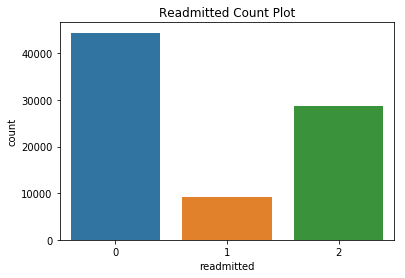

In [7]:
sns.countplot(x=y_column, data=y_train)
plt.title('Readmitted Count Plot')
plt.show()

#### Observing null values in the dataset

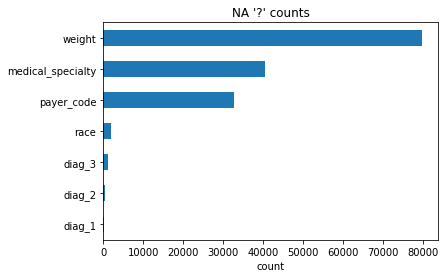

In [8]:
na = x_train.replace('?',np.nan,inplace=False).isnull().sum()
na = na.sort_values()
na.tail(7).plot.barh()
plt.xlabel('count')
plt.title("NA '?' counts")
plt.show()

In [9]:
max_na_columns = ['weight','payer_code','medical_specialty']

#### Observing unique values in the dataset 

In [10]:
x_train.describe()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433,82433
unique,82433,60699,6,3,10,10,8,26,17,14,18,70,118,7,75,39,32,21,697,717,760,16,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,1,2,2,2,2
top,246677502,88785891,Caucasian,Female,[70-80),?,1,1,7,3,?,?,1,0,12,0,0,0,428,276,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
freq,1,28,61637,44219,21054,79815,43738,48849,46517,14409,32558,40500,2653,37754,4902,68835,73226,54807,5466,5493,9363,39995,78112,68649,66335,81204,81859,82368,78207,82432,72225,73861,82415,76482,77242,82175,82405,82430,82401,82433,82433,38297,81871,82423,82433,82431,82432,44404,63516


In [11]:
single_value_columns = ['examide', 'citoglipton', 'glimepiride-pioglitazone']

#### Distribution of 'Age' Feature in the dataset

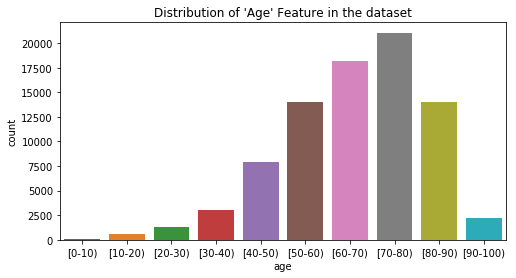

In [12]:
age_cat = x_train.age.unique()
age_cat.sort()
plt.figure(figsize=(8,4))
sns.countplot(x='age', data=x_train, order = age_cat)
plt.title("Distribution of 'Age' Feature in the dataset")
plt.show()

#### Distribution of 'Weight' Feature in the dataset

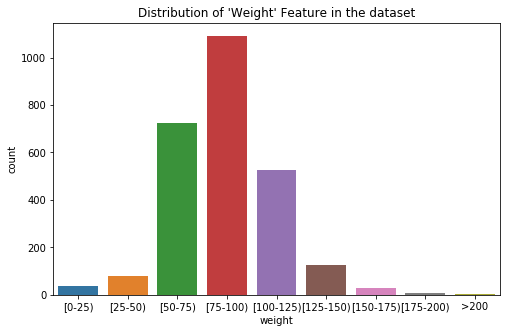

In [13]:
weight_cat = x_train.weight.replace('?',np.nan,inplace=False).dropna().unique()
plt.figure(figsize=(8,5))
sns.countplot(x='weight', data=x_train, order = ['[0-25)', '[25-50)','[50-75)',  '[75-100)','[100-125)',  '[125-150)','[150-175)',
        '[175-200)', '>200'])
plt.title("Distribution of 'Weight' Feature in the dataset")
plt.show()

#### Categorical Features

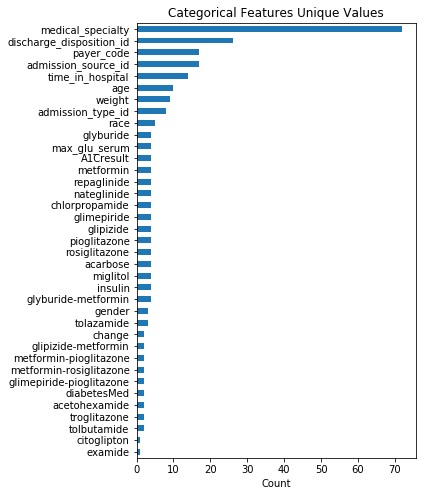

In [14]:
categorical_cols = ['weight','race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
       'time_in_hospital', 'payer_code', 'medical_specialty',
        'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'] 
categories = {}
cnt_df = pd.DataFrame()
for column in categorical_cols:
    categories[column] = xy[column].replace('?',np.nan,inplace=False).dropna().unique()
    cnt_df[column] = [categories[column].shape[0], categories[column]]

cnts = cnt_df.iloc[0]
cnts = cnts.sort_values()
plt.figure(figsize=(5,8))
cnts.plot.barh()
plt.title("Categorical Features Unique Values")
plt.xlabel("Count")
plt.show()

In [15]:
cnt_df.head()

,weight,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,9,5,3,10,8,26,17,14,17,72,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2
1,"[[75-100), [100-125), [50-75), [25-50), [0-25)...","[Caucasian, AfricanAmerican, Asian, Other, His...","[Male, Female, Unknown/Invalid]","[[60-70), [30-40), [20-30), [40-50), [70-80), ...","[3, 1, 2, 6, 5, 8, 4, 7]","[1, 18, 3, 4, 25, 6, 5, 22, 2, 11, 28, 14, 7, ...","[1, 7, 17, 4, 2, 6, 5, 14, 9, 20, 3, 10, 8, 13...","[1, 4, 2, 3, 6, 5, 8, 13, 12, 7, 10, 14, 11, 9]","[BC, MC, CP, HM, CM, UN, OG, MD, SP, PO, DM, W...","[Cardiology, OutreachServices, InternalMedicin...","[None, >200, Norm, >300]","[None, >8, Norm, >7]","[No, Up, Steady, Down]","[No, Steady, Up, Down]","[No, Steady, Down, Up]","[No, Steady, Up, Down]","[No, Up, Steady, Down]","[No, Steady]","[No, Steady, Up, Down]","[No, Steady, Up, Down]","[No, Steady]","[No, Steady, Up, Down]","[No, Down, Steady, Up]","[No, Steady, Up, Down]","[No, Down, Steady, Up]","[No, Steady]","[No, Steady, Up]",[No],[No],"[No, Down, Up, Steady]","[No, Steady, Up, Down]","[No, Steady]","[No, Steady]","[No, Steady]","[No, Steady]","[No, Ch]","[No, Yes]"


#### ID features

In [16]:
id_columns = ['encounter_id','patient_nbr']
x_train[id_columns].head()

,encounter_id,patient_nbr
0,150020214,43741620
1,224381694,41129856
2,215931306,53920314
3,160348158,83788758
4,61749426,16313625


#### Duplicate rows

In [17]:
ids = xy_train["patient_nbr"]
xy_train[ids.isin(ids[ids.duplicated()])].sort_values("patient_nbr").head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
46531,55533660,1152,AfricanAmerican,Female,[60-70),?,1,1,7,10,?,Hematology/Oncology,54,2,19,0,0,1,282,276,428,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,2
75722,30180318,1152,AfricanAmerican,Female,[50-60),?,1,1,7,6,?,Hematology/Oncology,45,4,15,0,0,2,282,794,250,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,2
40911,8380170,1152,AfricanAmerican,Female,[50-60),?,1,1,7,6,?,Hematology/Oncology,43,2,13,0,0,1,282,250.01,?,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,2
38928,80742510,1152,AfricanAmerican,Female,[60-70),?,1,1,7,8,?,?,30,1,16,0,0,1,282,250,?,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,2
12972,70190028,1314,Caucasian,Female,[40-50),?,1,1,7,1,?,InternalMedicine,47,5,12,0,0,1,414,411,250.01,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,1


# Data Processing

In [18]:
from sklearn.preprocessing import StandardScaler

class DataProcessor:
    
    def __init__(self, data):
        self.categorical_columns = ['gender', 'race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                                     'medical_specialty', 'max_glu_serum', 'A1Cresult','metformin', 'repaglinide',
                                    'nateglinide', 'chlorpropamide','glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                                    'tolbutamide','pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
                                    'troglitazone','tolazamide', 'insulin', 'glyburide-metformin', 
                                    'glipizide-metformin','metformin-rosiglitazone',
                                    'metformin-pioglitazone', 'change', 'diabetesMed','diag_1','diag_2','diag_3']
        self.numerical_columns = ['age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                              'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 
                              'number_diagnoses', 'number_services']
        self.age_dict = {
            '[0-10)'    : 5,
            '[10-20)'   : 15,
            '[20-30)'   : 25,
            '[30-40)'   : 35,
            '[40-50)'   : 45,
            '[50-60)'   : 55, 
            '[60-70)'   : 65,
            '[70-80)'   : 75,
            '[80-90)'   : 85,
            '[90-100)'  : 95
        }
        self.weight_dict = {
            '[0-25)'    : 12.5,
            '[25-50)'   : 37.5,
            '[50-75)'   : 62.5,
            '[75-100)'  : 87.5,
            '[100-125)' : 112.5,
            '[125-150)' : 137.5,
            '[150-175)' : 162.5,
            '[175-200)' : 187.5,
            '>200'      : 212.5
        }
        self.scaler = StandardScaler()
        self.categories= {}
        self.build_categories(data)
    
    '''
    This method generates unique categories for all categorical data and stores them in the dictionary
    '''
    def build_categories(self, data):
        for column in self.categorical_columns:
            self.categories[column] = data[column].replace('?',np.nan,inplace=False).dropna().unique()
        self.categories['diag_1'] = list(range(-1, 9))
        self.categories['diag_2'] = list(range(-1, 9))
        self.categories['diag_3'] = list(range(-1, 9))
    
    '''
    This method converts age column to numerical
    '''
    def age_to_numeric(self, x):
        if self.isNAN(x):
            return 0
        return self.age_dict[x]
    
    '''
    This method converts weight column to numerical
    '''
    def weight_to_numeric(self, x):
        if self.isNAN(x):
            return 0
        return self.weight_dict[x]
    
    '''
    This method converts diagnosis categories to fewer categories based on ICD9 codes
    '''
    def diag_to_category(self, x):
        if self.isNAN(x):
            return x
        if 'V' in x or 'E' in x:
            return 0
        x = float(x)
        if (x >= 390 and x <= 459) or np.floor(x) == 785:
            return 1
        elif (x >= 460 and x < 520) or np.floor(x) == 786:
            return 2
        elif (x >= 520 and x < 580) or np.floor(x) == 787:
            return 3
        elif np.floor(x) == 250:
            return 4
        elif (x >= 800 and x < 1000):
            return 5
        elif (x >= 710 and x < 740):
            return  6
        elif (x >= 580 and x < 630) or np.floor(x) == 788:
            return 7
        elif (x >= 140 and x < 240):
            return 8
        return 0
    
    '''
    This method checks if the valu of variable is NaN
    '''
    def isNAN(self, x):
        if x != x:
            return True
        return False
    
    '''
    This method collapses multiple categories to a single category 
    '''
    def collapse(self, data, feature, old_ids, new_id):
        for xid in old_ids:
            data[feature] = data[feature].replace(xid,new_id)
        return data
    
    '''
    This method splits the data in X and Y
    '''
    def split(self, data):
        x = data.loc[:, data.columns != y_column]
        y = data[y_column]
        return x,y
    
    '''
    This method processes the raw data based on the outcome of data overview
    '''
    def process(self, data, is_train = False):
        
        print("Processing data of shape " + str(data.shape))
        
        #drop duplicates if exists
        if is_train:
            data = data.drop_duplicates()
        
        #drop useless id columns
        data = data.drop(['encounter_id','patient_nbr'], axis = 1)
        
        #drop single value columns
        data = data.drop(['examide', 'citoglipton', 'glimepiride-pioglitazone'], axis = 1)
        
        #replace ? with nan
        data = data.replace('?',np.nan,inplace=False)
        
        #diagnostics
        data['diag_1'] = data.diag_1.apply(self.diag_to_category)
        data['diag_2'] = data.diag_2.apply(self.diag_to_category)
        data['diag_3'] = data.diag_3.apply(self.diag_to_category)
        
        #service utilizations
        data['number_services'] = data.number_outpatient + data.number_emergency + data.number_inpatient
       
        #collapsed these variables into fewer categories where it made sense
        data = self.collapse(data, 'gender', ['Unknown/Invalid'], np.nan)
        data = self.collapse(data, 'discharge_disposition_id', [11, 19, 20, 21], 11)
        data = self.collapse(data, 'discharge_disposition_id', [18, 25, 26], 18)
        data = self.collapse(data, 'admission_type_id', [5, 6, 8], 5)
        data = self.collapse(data, 'admission_type_id', [1, 2, 7], 1)
        data = self.collapse(data, 'admission_source_id', [9, 15, 17, 20, 21], 9)
        
        #convert to numeric
        data['age'] = data.age.apply(self.age_to_numeric)
        data['weight'] = data.weight.apply(self.weight_to_numeric)
        
        #drop columns with maximum na values
        data = data.drop(['payer_code'],axis = 1)
        
        #one hot encoding
        for column in self.categorical_columns:
            data[column] = data[column].astype('category', categories = self.categories[column])
            
        data = pd.get_dummies(data, columns = self.categorical_columns, dummy_na = True)
        
        x_data, y_data = self.split(data=data)
        
        x_data_values = x_data.values
        x_data_columns = x_data.columns
        
        #numerical features rescale
        if is_train:
            self.scaler.fit(x_data_values)
        
        x_data_values = self.scaler.transform(x_data_values)
        x_data = pd.DataFrame(data=x_data_values, columns=x_data_columns)
        
        return x_data, y_data

In [19]:
#preprocess the raw data
dp = DataProcessor(xy)
x_train_n, y_train_n = dp.process(xy_train, is_train = True)
x_valid_n, y_valid_n = dp.process(xy_valid)
x_test_n, y_test_n = dp.process(xy_test)

Processing data of shape (82433, 50)
Processing data of shape (9158, 50)
Processing data of shape (10175, 50)


In [20]:
#X shape after preprocessing
print(x_train_n.shape)
print(x_valid_n.shape)
print(x_test_n.shape)

(82433, 284)
(9158, 284)
(10175, 284)


In [21]:
#Y shape after preprocessing
print(y_train_n.shape)
print(y_valid_n.shape)
print(y_test_n.shape)

(82433,)
(9158,)
(10175,)


In [22]:
x_train_n.head()

,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,number_services,gender_Male,gender_Female,gender_Unknown/Invalid,gender_nan,race_Caucasian,race_AfricanAmerican,race_Asian,race_Other,race_Hispanic,race_nan,admission_type_id_3.0,admission_type_id_1.0,admission_type_id_2.0,admission_type_id_6.0,admission_type_id_5.0,admission_type_id_8.0,admission_type_id_4.0,admission_type_id_7.0,admission_type_id_nan,discharge_disposition_id_1.0,discharge_disposition_id_18.0,discharge_disposition_id_3.0,discharge_disposition_id_4.0,discharge_disposition_id_25.0,discharge_disposition_id_6.0,discharge_disposition_id_5.0,discharge_disposition_id_22.0,discharge_disposition_id_2.0,discharge_disposition_id_11.0,discharge_disposition_id_28.0,discharge_disposition_id_14.0,discharge_disposition_id_7.0,discharge_disposition_id_24.0,discharge_disposition_id_23.0,discharge_disposition_id_13.0,discharge_disposition_id_8.0,discharge_disposition_id_15.0,discharge_disposition_id_16.0,discharge_disposition_id_12.0,discharge_disposition_id_9.0,discharge_disposition_id_19.0,discharge_disposition_id_27.0,discharge_disposition_id_10.0,discharge_disposition_id_17.0,discharge_disposition_id_20.0,discharge_disposition_id_nan,admission_source_id_1.0,admission_source_id_7.0,admission_source_id_17.0,admission_source_id_4.0,admission_source_id_2.0,admission_source_id_6.0,admission_source_id_5.0,admission_source_id_14.0,admission_source_id_9.0,admission_source_id_20.0,admission_source_id_3.0,admission_source_id_10.0,admission_source_id_8.0,admission_source_id_13.0,admission_source_id_22.0,admission_source_id_25.0,admission_source_id_11.0,admission_source_id_nan,medical_specialty_Cardiology,medical_specialty_OutreachServices,medical_specialty_InternalMedicine,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Surgery-General,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Orthopedics,medical_specialty_Psychiatry,medical_specialty_Radiologist,medical_specialty_Gastroenterology,medical_specialty_Nephrology,medical_specialty_Oncology,medical_specialty_Surgery-Thoracic,medical_specialty_Pulmonology,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Surgery-Cardiovascular,medical_specialty_Surgery-Vascular,medical_specialty_Gynecology,medical_specialty_ObstetricsandGynecology,medical_specialty_Hematology/Oncology,medical_specialty_Otolaryngology,medical_specialty_Pediatrics-Endocrinology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_SportsMedicine,medical_specialty_Pediatrics,medical_specialty_Hospitalist,medical_specialty_Urology,medical_specialty_Surgery-Neuro,medical_specialty_Pathology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Neurology,medical_specialty_Psychology,medical_specialty_Hematology,medical_specialty_Radiology,medical_specialty_Surgeon,medical_specialty_Ophthalmology,medical_specialty_Surgery-Colon&Rectal,medical_specialty_Surgery-Pediatric,medical_specialty_InfectiousDiseases,medical_specialty_Rheumatology,medical_specialty_Obsterics&Gynecology-GynecologicOnco,medical_specialty_Osteopath,medical_specialty_Endocrinology,medical_specialty_Podiatry,medical_specialty_Pediatrics-Pulmonology,medical_specialty_SurgicalSpecialty,medical_specialty_DCPTEAM,medical_specialty_Endocrinology-Metabolism,medical_specialty_Obstetrics,medical_specialty_Surgery-Maxillofacial,medical_specialty_Psychiatry-Child/Adolescent,medical_specialty_Anesthesiology-Pediatric,medical_specialty_PhysicianNotFound,medical_specialty_Resident,medical_specialty_Surgery-Plastic,medical_specialty_Pediatrics-EmergencyMedicine,medical_specialty_Anesthesiology,medical_specialty_Pediatrics-Neurology,medical_specialty_Cardiology-Pediatric,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Proctology,medical_specialty_Pediatrics-Hematology-Oncology,medical_specialty_AllergyandImm

In [23]:
# convert dataframe to numpy arrays so they can be provided as input to ML algorithms
def convert(x_df, y_df):
    x = x_df.values
    y = y_df.values
    return x, y

In [24]:
# make data ready for model evaluation
X_train,Y_train = convert(x_train_n, y_train_n)
X_valid,Y_valid = convert(x_valid_n, y_valid_n)
X_test,Y_test = convert(x_test_n, y_test_n)

#### Principle Component Analysis

In [25]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

'''
This method is used to get best dimensions for PCA
'''
def get_dims_variances(X, min_dim, max_dim, threshold=0.1, capToThreshold=False):
    dims = []
    variances = []
    optimum_dim = min_dim
    for dim in range(min_dim, max_dim):
        pca = PCA(n_components=dim)
        pca.fit(X)
        variance = np.array(pca.explained_variance_ratio_)
        variance = variance.min()
        if threshold < variance:
            optimum_dim = dim
            dims.append(dim)
            variances.append(variance)
        else:
            if capToThreshold:
                break
        
    return dims, variances, optimum_dim

def getOptimumDim(data):
    dims, variances, optimum_dim = get_dims_variances(data, 2, int(data.shape[1] / 3), 0.0025, capToThreshold=True)
    plt.plot(dims, variances)
    plt.xlabel("Dimension")
    plt.ylabel("Variance")
    plt.title("PCA-dimensions vs variance")
    plt.show()
    return optimum_dim + 1

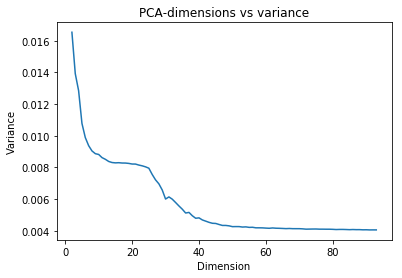

In [26]:
#use PCA to obtain best k principle components
_ = getOptimumDim(X_train)

In [27]:
#We chose 45 best principle components
dim = 45
pca = PCA(n_components=dim)
pca.fit(X_train)
X_train_p = pca.transform(X_train)
X_valid_p = pca.transform(X_valid)
X_test_p = pca.transform(X_test)

In [28]:
print(X_train_p.shape)
print(X_valid_p.shape)
print(X_test_p.shape)

(82433, 45)
(9158, 45)
(10175, 45)


# Model Selection and Evaluation

In [29]:
import gc
import json

class Processor:
    def __init__(self):
        self.X_train = None
        self.Y_train = None
        self.X_valid = None 
        self.Y_valid = None
        self.X_test = None
        self.Y_test = None
    
    '''
    This method is used to build the object on provided input
    '''
    def build(self, X_train, Y_train, X_valid, Y_valid, X_test, Y_test):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_valid = X_valid 
        self.Y_valid = Y_valid
        self.X_test = X_test
        self.Y_test = Y_test
       
    '''
    select best hyperparameters and learner using RandomizedSearchCV, using training data and validation data
    '''
    def select_best_learner_randomsearch(self, base_learner, params, n=5, verbose=1):
        from sklearn.model_selection import PredefinedSplit,GridSearchCV, StratifiedShuffleSplit, RandomizedSearchCV
    
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.75, random_state=0)
        for train_index, test_index in sss.split(X_train, Y_train):
            X_tr_split = X_train[train_index]
            Y_tr_split  = Y_train[train_index]
    
        train_count = len(Y_tr_split)
        valid_count = len(Y_valid)
        searchX = np.concatenate((X_tr_split, X_valid), axis=0)
        searchY = np.concatenate((Y_tr_split, Y_valid), axis=0)
        fold = np.array([(i < train_count) * -1 for i in range(train_count + valid_count)])
        ps = PredefinedSplit(fold)
        clf = RandomizedSearchCV(base_learner, params, cv=ps, n_iter=n, random_state=1, verbose=verbose)
        clf.fit(searchX, searchY)
        
        return clf.best_params_, clf.best_estimator_
         
    '''
    Analyze the accuracy of the prediction on training, validation and test data
    '''    
    def analyze(self, learner):
        acc_train = learner.score(X_train, Y_train)
        acc_valid = learner.score(X_valid, Y_valid)
        acc_test = learner.score(X_test, Y_test)
        print("Training data accuracy = {0:.2f}".format(acc_train))
        print("Validation data accuracy = {0:.2f}".format(acc_valid))
        print("Test data accuracy = {0:.2f}".format(acc_test))
        return acc_train, acc_valid, acc_test
    
    '''
    Plot confusion matrix plot based on confusion matrix 
    '''   
    def plot_conf_matrix(self, cm, title):
        cm = cm.astype(int)
        df_cm = pd.DataFrame(cm)
        plt.figure(figsize=(4,4))
        sns.heatmap(df_cm, annot=True)
        plt.title(title)
        plt.show()
        
    '''
    Find accuracy of prediction
    '''   
    def build_report(self, Y_orig, Y_pred, data_type):
        from sklearn.metrics import accuracy_score, confusion_matrix
        acc = accuracy_score(Y_orig, Y_pred)*100
        print(data_type +" accuracy = {0:.2f}".format(acc))
        self.plot_conf_matrix(confusion_matrix(Y_orig, Y_pred), data_type)
        return acc
    
    '''
    This method is used for selecting best learner, hyperparameters and 
    performance evaluation of the best learner
    '''
    def hyperparameter_tuning(self, base_class, params, n=5):
        params, learner = self.select_best_learner_randomsearch(base_class, params, n )
        learner = None
        gc.collect()
        return params
    
    '''
    This method evaluates the model on validation and test data by performing training on training data 
    '''
    def evaluate(self, clf):
        clf.fit(X_train, Y_train)
        return self.analyze(clf)
    
    '''
    This is a utility function
    '''
    def save_dict_to_file(self, data, filename):
        json.dump(data, open(filename, 'w'))
    
    '''
    This is a utility function
    '''
    def load_dict_from_file(self, filename):
        with open(filename, 'r') as fp:
            data = json.load(fp)
            
        return data

In [30]:
p = Processor()
p.build(X_train_p, Y_train, X_valid_p, Y_valid, X_test_p, Y_test)

In [31]:
model_acc = {}
model_params = {}
models = {}

In [32]:
model_default_acc = {}

### Logistic Regression

##### Hyper-parameter tuning

In [33]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
params = {
    'penalty' : ['l1', 'l2'],
    'C': uniform(loc=0, scale=4),
    'tol': [1e-1, 1e-2, 1e-3, 1e-4],
    'class_weight' : ['balanced'],
    'max_iter': [16, 32, 64, 100]
}

best_params = p.hyperparameter_tuning(LogisticRegression(), params, n=10)
print("=== Best Params ===")
print(best_params)

Fitting 1 folds for each of 10 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.8min finished


=== Best Params ===
{'C': 1.7227942687388338, 'class_weight': 'balanced', 'max_iter': 64, 'penalty': 'l1', 'tol': 0.001}


##### Tuned Learner

In [34]:
technique = 'Logistic Regression'
models[technique] = LogisticRegression(**best_params)
acc_train, acc_valid, acc_test = p.evaluate(models[technique])
model_acc[technique] = [acc_train, acc_valid, acc_test]
model_params[technique] = best_params

Training data accuracy = 0.57
Validation data accuracy = 0.57
Test data accuracy = 0.57


In [35]:
p.save_dict_to_file(model_acc, 'model_acc.json')
p.save_dict_to_file(data=model_params, filename='model_params.json')

#### Decision Tree Classifier

##### Hyper-parameter tuning

In [36]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

params = {
          'min_samples_split': randint(5, 11),
          'min_samples_leaf':randint(2, 11),
          "max_features" : [None, "sqrt", "log2"],
          "criterion": ["gini", "entropy"],
          'class_weight' : ['balanced']
         }

best_params = p.hyperparameter_tuning(DecisionTreeClassifier(), params, n=10)
print("=== Best Params ===")
print(best_params)

Fitting 1 folds for each of 10 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.8s finished


=== Best Params ===
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 9}


##### Tuned Learner

In [38]:
technique = 'Decision Tree'
models[technique] = DecisionTreeClassifier(**best_params)
acc_train, acc_valid, acc_test = p.evaluate(models[technique])
model_acc[technique] = [acc_train, acc_valid, acc_test]
model_params[technique] = best_params

Training data accuracy = 0.76
Validation data accuracy = 0.44
Test data accuracy = 0.43


In [39]:
p.save_dict_to_file(model_acc, 'model_acc.json')
p.save_dict_to_file(data=model_params, filename='model_params.json')

#### Random Forest Classifier

##### Hyper-parameter tuning

In [40]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

params = {"max_depth": randint(10, 30),
              "n_estimators" : randint(100, 130),
              "min_samples_split": randint(5, 11),
              "bootstrap": [True, False],
              "max_features" : [None, "sqrt", "log2"],
              "criterion": ["gini", "entropy"],
              'n_jobs' : [8],
              'class_weight' : ['balanced', 'balanced_subsample']
         }

best_params = p.hyperparameter_tuning(RandomForestClassifier(), params, n=15)
print("=== Best Params ===")
print(best_params)

/Users/yogesh/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Fitting 1 folds for each of 15 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.6min finished


=== Best Params ===
{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 29, 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 108, 'n_jobs': 8}


##### Tuned Learner

In [41]:
technique = 'Random Forest'
models[technique] = RandomForestClassifier(**best_params)
acc_train, acc_valid, acc_test = p.evaluate(models[technique])
model_acc[technique] = [acc_train, acc_valid, acc_test]
model_params[technique] = best_params

Training data accuracy = 0.89
Validation data accuracy = 0.57
Test data accuracy = 0.58


In [42]:
p.save_dict_to_file(model_acc, 'model_acc.json')
p.save_dict_to_file(data=model_params, filename='model_params.json')

#### Support Vector Machine

##### Hyper-parameter tuning

In [43]:
from sklearn.svm import SVC
params = {
            'kernel': ['rbf', 'poly'], 
            'C': randint(1, 10),
            'class_weight' : ['balanced'],
            'tol' : [1e-2, 1e-3],
            'max_iter' : [128, 256, 512, 1024],
            'decision_function_shape' : ['ovo', 'ovr']
        }
print("=== Best Params ===")
best_params = p.hyperparameter_tuning(SVC(), params, n=10)
print(best_params)

=== Best Params ===
Fitting 1 folds for each of 10 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.7min finished


{'C': 8, 'class_weight': 'balanced', 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'max_iter': 512, 'tol': 0.001}


##### Tuned Learner

In [44]:
technique = 'SVM'
models[technique] = SVC(**best_params)
acc_train, acc_valid, acc_test = p.evaluate(models[technique])
model_acc[technique] = [acc_train, acc_valid, acc_test]
model_params[technique] = best_params

Training data accuracy = 0.33
Validation data accuracy = 0.32
Test data accuracy = 0.33


In [45]:
p.save_dict_to_file(model_acc, 'model_acc.json')
p.save_dict_to_file(data=model_params, filename='model_params.json')

#### Neural Network

In [46]:
def analyze(learner, X_train, Y_train, X_valid, Y_valid, X_test, Y_test):
    acc_train = learner.evaluate(X_train, Y_train)[1]
    acc_valid = learner.evaluate(X_valid, Y_valid)[1]
    acc_test = learner.evaluate(X_test, Y_test)[1]
    print("Training data accuracy = {0:.2f}".format(acc_train))
    print("Validation data accuracy = {0:.2f}".format(acc_valid))
    print("Test data accuracy = {0:.2f}".format(acc_test))
    return acc_train, acc_valid, acc_test

In [47]:
np.random.seed(7)

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit([0,1,2])

droprate = 0.2

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [ModelCheckpoint('model_with_weights.h5', monitor='val_acc', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='max', period=1)]

model = Sequential()
model.add(Dense(128, input_shape=(X_train_p.shape[1],), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(droprate))
model.add(Dense(256, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(droprate))
model.add(Dense(256, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(droprate))
model.add(Dense(128, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(droprate))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(X_train_p, lb.transform(Y_train), epochs=25, batch_size=32, 
          verbose=0, 
          callbacks=callbacks,
          validation_data = (X_valid_p, lb.transform(Y_valid)))


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               5888      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
__________

In [48]:
acc_train, acc_valid, acc_test = analyze(model, X_train_p, lb.transform(Y_train), X_valid_p, lb.transform(Y_valid), 
                                         X_test_p, lb.transform(Y_test) )

model_acc['MLP'] = [acc_train, acc_valid, acc_test]
model_params['MLP'] = 'model_with_weights.h5'
del model

10175/10175 [==============================] - 0s 31us/step
Training data accuracy = 0.60
Validation data accuracy = 0.58
Test data accuracy = 0.59


# Comparing Model Performance

In [49]:
train_accs = []
valid_accs = []
test_accs = []
for model in model_acc:
    train_accs.append(model_acc[model][0])
    valid_accs.append(model_acc[model][1])
    test_accs.append(model_acc[model][2])

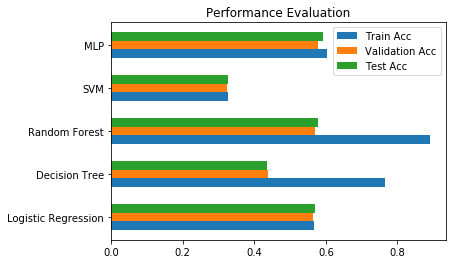

In [50]:
N = len(train_accs)
fig, ax = plt.subplots()
ind = np.arange(N) 
width = 0.2
p1 = ax.barh(ind - width, train_accs, width)
p2 = ax.barh(ind, valid_accs, width)
p3 = ax.barh(ind + width, test_accs, width)
ax.set_title('Performance Evaluation')
ax.set_yticks(ind)
ax.set_yticklabels(list(model_acc.keys()))
ax.legend((p1[0], p2[0], p3[0]), ('Train Acc', 'Validation Acc', 'Test Acc'))
ax.autoscale_view()
plt.show()


Validation for Logistic Regression accuracy = 56.07


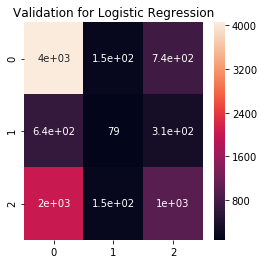

Testing for Logistic Regression accuracy = 56.52


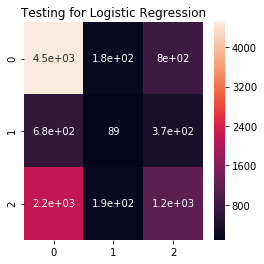


Validation for Decision Tree accuracy = 43.55


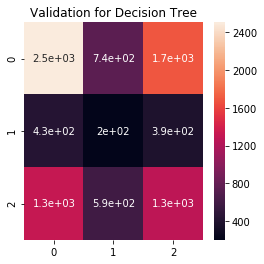

Testing for Decision Tree accuracy = 44.47


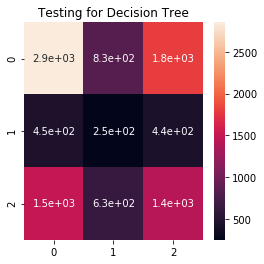


Validation for Random Forest accuracy = 56.86


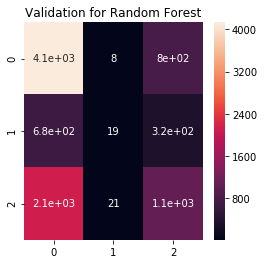

Testing for Random Forest accuracy = 56.88


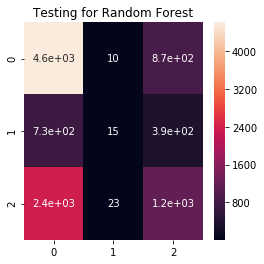


Validation for SVM accuracy = 38.11


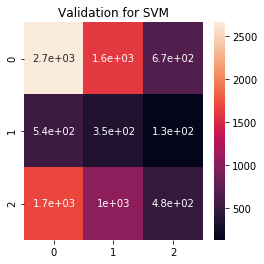

Testing for SVM accuracy = 38.02


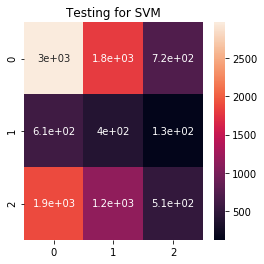

Epoch 1/1
82433/82433 [==============================] - 11s 134us/step - loss: 0.8733 - acc: 0.5892

Validation for MLP accuracy = 58.26


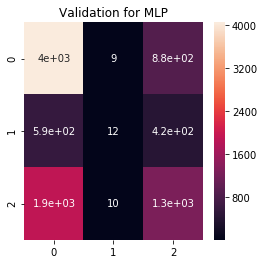

Testing for MLP accuracy = 58.79


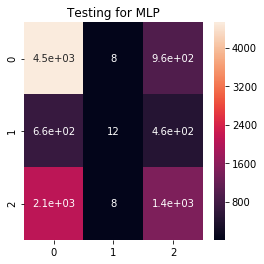

In [51]:
for key in model_acc:
    acc_train, acc_valid, acc_test = model_acc[key]
    params = model_params[key]
    y_tr = Y_train
    
    if key == 'MLP':
        learner = load_model(params)
        y_tr = lb.transform(Y_train)
        
    else:
        learner = models[key]
        
    learner.fit(X_train_p, y_tr)
    print()
    
    for (x, y, l) in [(X_valid_p, Y_valid, "Validation"), (X_test_p, Y_test, "Testing")]:
        Y_pred = learner.predict(x)
        Y_orig = y
        if key == 'MLP':
            Y_pred = np.argmax(Y_pred, axis=1)
            
        p.build_report(Y_orig, Y_pred, data_type=l + " for " + str(key))
    